In [1]:
# NAME:            MASONGO UMAR
# STUDENT NUMBER:  1800738510
# REGISTRATION NO: 22018/HD05/1967U

import cv2 as cv
import numpy as np
import sys
import argparse

from matplotlib import pyplot as plt
from __future__ import print_function
from scipy import ndimage

<function matplotlib.pyplot.show(close=None, block=None)>

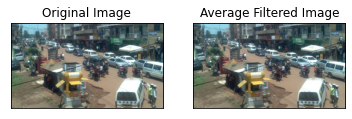

In [5]:
# Average Filter

# Average filter is used to blur an image in order to remove the noise
# The average of pixel values in a m x m matrix is first determined
# The pixel intensity of the center element is then replaced by the mean

average_image = cv.imread("./images/frame18756.jpg")
average_image = cv.cvtColor(average_image, cv.COLOR_BGR2RGB)

# Covolve a 3x3 kernel with the image
average_filter = cv.blur(average_image, (3,3)) 

plt.subplot(121),plt.imshow(average_image),plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(average_image),plt.title("Average Filtered Image")
plt.xticks([]), plt.yticks([])
plt.show

# Pros of Average filter
# 1. It reduces speckle noise in colored images does not lose image details 
# 2. It removes noise in grayscale images and does not create artifacts. 

# Cons of Average filter
# 1. It creates some artifacts in colored images
# 2. Some image details are lost in grayscale images

<function matplotlib.pyplot.show(close=None, block=None)>

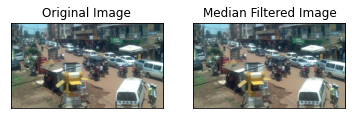

In [6]:
# Median Filter

# Median filter is used to calculate the median of the pixel values
# that are around the center pixel in a m x m kernel. 
# The pixel intensity of the center pixel is then replaced by the median value

median_image = cv.imread("./images/frame18756.jpg")
median_image = cv.cvtColor(median_image, cv.COLOR_BGR2RGB)
median_filter = cv.medianBlur(median_image, 3)

plt.subplot(121),plt.imshow(median_image),plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median_image),plt.title("Median Filtered Image")
plt.xticks([]), plt.yticks([])
plt.show

# Pros of Median filter
# 1. It performs better when removing salt and paper noise compared to the Mean and Gaussian filters
# 2. It preserves image edges

# Cons of Median filter
# 1. It is not good at removing speckle noise

<function matplotlib.pyplot.show(close=None, block=None)>

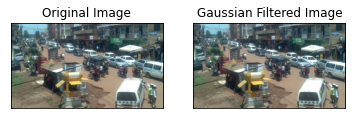

In [7]:
# Gaussian Filter

# Guassian filter is simillar to the mean filter expect that it uses the weighted
# avarage of the surrounding pixels and has a parameter sigma,.
# The Guassina filter is highely effective at removing Gaussian noise from an image

gaussian_image = cv.imread("./images/frame18756.jpg")
gaussian_image = cv.cvtColor(gaussian_image, cv.COLOR_BGR2RGB)
gaussian_filter = cv.GaussianBlur(gaussian_image, (3,3), 1)

plt.subplot(121),plt.imshow(gaussian_image),plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_image),plt.title("Gaussian Filtered Image")
plt.xticks([]), plt.yticks([])
plt.show

# Pros of Gaussian filter
# 1. It performs better than the mean filter when preserving images of a simillar size

# Cons of Gaussian filter
# 1.It blurs the image edges just like the mean filter

In [8]:
# Varying the filters from 3x3 to 7x7 and α =1 to 5 increases on the bluring effect.

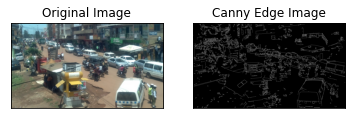

In [9]:
# Canny Edge Detection

# Canny Edge Detection is a multi-stage algorithm that  first removes noise from an image,
# then gets the Intensity Gradient of the Image, later does a full scan of
# the image to remove any unwanted pixels which may not constitute the edge,
# and finally does Hysteresis Thresholding

canny_image = cv.imread("./images/frame18757.jpg")
canny_image = cv.cvtColor(canny_image, cv.COLOR_BGR2RGB)
canny_edges = cv.Canny(canny_image, 50, 200)

plt.subplot(121),plt.imshow(canny_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Pros of Canny Edge Detection
# 1. The algorithm provides better detection perfomance in noise condition environments
# compared to other detection techniques.
# 2. It can produce good thin and smooth detection of the edge

# Cons of Canny Edge Detection
# 1. It is a more computationaly complex and time consuming compared to other edge 
# detection algorithms
# 2. It gives false edges if the threshold is too low or some edges may be missing if the
# threshold is too high.

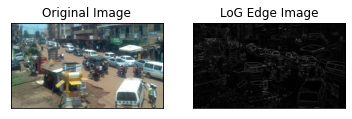

In [10]:
# The Laplacian of Gaussian (LoG) Edge Detection Technique

# LoG is a Second-order differential algorithm whcih  first smoothes the image using the 
# Gaussian low-pass filter and then computes the image edges of the steep using the Laplacian algorithm.

# [variables]
# Declare the variables we are going to use
ddepth = cv.CV_16S
kernel_size = 3

# Load the image
log_image = cv.imread("./images/frame18757.jpg") 
log_image = cv.cvtColor(log_image, cv.COLOR_BGR2RGB)

# [reduce_noise]
# Remove noise by blurring with a Gaussian filter
log_image = cv.GaussianBlur(log_image, (3, 3), 0)
# [reduce_noise]

# [convert_to_gray]
# Convert the image to grayscale
log_gray = cv.cvtColor(log_image, cv.COLOR_BGR2GRAY)
# [convert_to_gray]

# [laplacian]
# Apply Laplace function
dst = cv.Laplacian(log_gray, ddepth, ksize=kernel_size)
# [laplacian]

# [convert]
# converting back to uint8
final_image = cv.convertScaleAbs(dst)
# [convert]

plt.subplot(121),plt.imshow(log_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(final_image,cmap = 'gray')
plt.title('LoG Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Pros of LoG
# 1. It is good at finding the correct places of edges and tests a broad area around the pixel 
# 2. It ensures that the pixels at the place where intensity changes takes place

# Cons of LoG
# 1. It does'nt perform well around image corners, curves and where the grey level pixel intensity function varies
# 2. It can't find the direction of edge because it uses the Laplacian filter

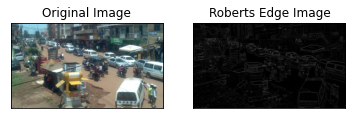

In [11]:
# Roberts Edge Detection Technique

# Roberts edge detection operator is based on the principle that difference on any
# pair of mutually perpendicular direction can be used to calculate the gradient.

roberts_image = cv.imread("./images/frame18757.jpg") # Read image
roberts_image = cv.cvtColor(roberts_image, cv.COLOR_BGR2RGB)

# Grayscale processing image
roberts_gray_Image = cv.cvtColor(roberts_image, cv.COLOR_BGR2GRAY)

# Roberts operator
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)

x = cv.filter2D(roberts_gray_Image, cv.CV_16S, kernelx)
y = cv.filter2D(roberts_gray_Image, cv.CV_16S, kernely)

# Turn uint8, image fusion
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
roberts_edge_image = cv.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.subplot(121),plt.imshow(roberts_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(roberts_edge_image,cmap = 'gray')
plt.title('Roberts Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Pros of Roberts Edge Detection
# 1.It is a simple and computationally efficient edge detection technique 
# 2. It's diagonal direction points are preserved

# Cons of Roberts Edge Detection Technique
# 1. It can’t detect that type of edges which are multiplie s of 45 degrees ant it is not symmetric
# 2. It is very sensitive to the noise and it's accuracy decreases as the gradient magnitude of the edges decreases

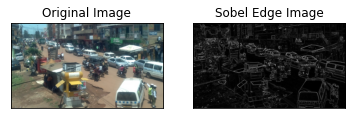

In [12]:
# Sobel Edge Detection Technique

# The Sobel technique performs a 2-D spatial gradient quantity on an image and so
# highlights regions of high spatial frequency that correspond to edges.

# Declare the variables to be used
scale = 1
delta = 0
ddepth = cv.CV_16S
    
# Load the image
sobel_image = cv.imread("./images/frame18757.jpg")
sobel_image = cv.cvtColor(sobel_image, cv.COLOR_BGR2RGB)
        
# Remove noise by blurring with a Gaussian filter ( kernel size = 3 )
sobel_image = cv.GaussianBlur(sobel_image, (3, 3), 0)
    
# Convert the image to grayscale
sobel_gray = cv.cvtColor(sobel_image, cv.COLOR_BGR2GRAY)
    
# Sobel operator
grad_x = cv.Sobel(sobel_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(sobel_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)  

plt.subplot(121),plt.imshow(sobel_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(grad,cmap = 'gray')
plt.title('Sobel Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Pros of Sobel Edge Detection Technique
# 1. The Sobel technique is simple in detecting edges and their orientation because it approximates the gradient calculation
# 2.Simple and time efficient computation
# 3.Very easy at searching for smooth edges


# Cons of Sobel Edge Detection Technique
# 1.Very sensitive to noise
# 2.Not very accurate in edge detection
# 3.An increase in noise degrades the gradient magnitude of the edges which produces inaccurate results
# 4.Diagonal direction points are not preserved always
# 5.Detect with thick and rough edges does not give appropriate results

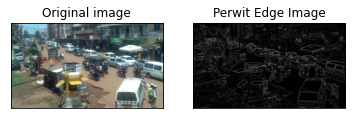

In [13]:
# Perwit Edege Detection Technique

# Perwit basically uses two masks, one for detecting image derivatives in X and
# one for detecting image derivative in Y. To find edges, a user convolves an image
# with both masks, producing two derivative images (dx and dy)

# Read image
perwit_image = cv.imread("./images/frame18757.jpg")
perwit_image = cv.cvtColor(perwit_image, cv.COLOR_BGR2RGB)
        

 # Grayscale processing image
perwit_gray = cv.cvtColor(perwit_image, cv.COLOR_BGR2GRAY)

 # Prewitt operator
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)

x = cv.filter2D(perwit_gray, cv.CV_16S, kernelx)
y = cv.filter2D(perwit_gray, cv.CV_16S, kernely)

 # Turn uint8, image fusion
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)
perwit_edge_image = cv.addWeighted(absX, 0.5, absY, 0.5, 0)

# Display graphics
titles = ['Original image','Perwit Edge Image']
images = [perwit_image, perwit_edge_image]

for i in range(2):
    plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

# Pros Perwit Edge Detection Technique
# 1. Prewitt technique is slightly simpler to implement computationally than the Sobel techniquedetection
# 2.Good performance on detecting vertical and horizontal edges
# 3.Best operator to detect the orientation of an image

# Cons of Perwit Edge Detection Technique
# 1. It tends to produce more noisier results than Sobel.
# 2.The magnitude of coefficient is fixed and cannot be changed
# 3.Diagonal direction points are not preserved always